# The simple model 12
Доработанная сеть 2.0 от Megnet

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

!pip install matminer
!pip install pymatgen
!pip install maml
!git clone https://github.com/bvd757/3DSC.git
!pip install megnet

from megnet.models import MEGNetModel
from megnet.data.crystal import CrystalGraph

from pymatgen.core.structure import Structure
from maml.describers import BPSymmetryFunctions

!pip install monty
from monty.json import MontyDecoder
from monty.serialization import loadfn

from megnet.data.crystal import CrystalGraph
from megnet.data.graph import GaussianDistance
from megnet.models import MEGNetModel

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/aimat-lab/3DSC/main/superconductors_3D/data/final/MP/3DSC_MP.csv', header = 1)
data1 = data.loc[data['tc'] > 0.1]
#data1 = data1.loc[data['tc'] < 30.0]
data_t = np.log(data1[['tc']])
data2 = data1[['formula_sc']]

In [3]:
from matminer.featurizers.composition import ElementProperty
from matminer.featurizers.conversions import StrToComposition
ep_feat = ElementProperty.from_preset(preset_name="magpie")
d = {"element": np.array(data2)[:, 0]}
df = pd.DataFrame(d)

df = StrToComposition().featurize_dataframe(df, "element")
df = ep_feat.featurize_dataframe(df, col_id = 'composition')

StrToComposition:   0%|          | 0/3950 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/3950 [00:00<?, ?it/s]

In [4]:
from megnet.utils.models import load_model, AVAILABLE_MODELS
from pymatgen.core import Structure, Lattice
from pymatgen.ext.matproj import MPRester
model = load_model('Efermi_MP_2019')
model.compile(loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [22]:
structure_for_test = Structure.from_file("/content/3DSC/superconductors_3D/data/final/MP/cifs/" + 'Ag0.55Hg0.45-MP-mp-770433.cif')
structures = {}
targets = {}
cif_index = []
print('_' * (len(os.listdir(path="/content/3DSC/superconductors_3D/data/final/MP/cifs")) // 100 + 1))
for i in enumerate(os.listdir(path="/content/3DSC/superconductors_3D/data/final/MP/cifs")):
    if i[0] % 100 == 0: print('_', end = "")
    if i[1][:i[1].find('-MP')] not in data1['formula_sc'].to_list(): continue
    j = data1.loc[data1['formula_sc'] == i[1][:i[1].find('-MP')]].index
    j = j[0]
    if j in targets.keys(): continue
    cif = Structure.from_file("/content/3DSC/superconductors_3D/data/final/MP/cifs/" + i[1])
    #if i[0] == 1000: break
    try:
        model.train([structure_for_test, cif], [1, 1], epochs=1,  verbose = 0);
        structures[j] = cif
        targets[j] = data1.loc[j]['tc']
        cif_index.append(i[0])
    except:
        continue
'''
df1 = df[['MagpieData mean AtomicWeight', 'MagpieData mean MeltingT',
'MagpieData mean Electronegativity', 'MagpieData mean NdValence', 
'MagpieData mean GSvolume_pa', 'MagpieData mean SpaceGroupNumber', 'MagpieData mean NdUnfilled']]
'''

/usr/local/lib/python3.10/dist-packages/pymatgen/io/cif.py:1147: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


______________________________________________________________________________________________________________
______________________________________________________________________________________________________________

"\ndf1 = df[['MagpieData mean AtomicWeight', 'MagpieData mean MeltingT',\n'MagpieData mean Electronegativity', 'MagpieData mean NdValence', \n'MagpieData mean GSvolume_pa', 'MagpieData mean SpaceGroupNumber', 'MagpieData mean NdUnfilled']]\n"

In [39]:
Keys = [373, 4082, 35, 3248, 4299, 3936, 5296, 4952, 195, 126, 4811, 1319, 1345, 3434, 4719, 5716, 2188, 2801, 2558, 4603, 4976, 2000, 845, 1001, 3961, 5566, 4017, 4259, 5354, 4900, 1220, 5174, 2350, 5635, 4140, 5529, 1351, 5057, 327, 4727, 3025, 2208, 4497, 1226, 3888, 4905, 5576, 4961, 1540, 1109, 3903, 5098, 5312, 5742, 2040, 4907, 799, 1234, 107, 4079, 3181, 2338, 4347, 5615, 4246, 2401, 2988, 5441, 4861, 2554, 4233, 5575, 4777, 5228, 910, 4860, 4047, 207, 1025, 5117, 2361, 4500, 1045, 484, 3208, 5549, 5699, 911, 5582, 5530, 5129, 3912, 5368, 4477, 2378, 4027, 3011, 313, 222, 5429, 100, 4730, 5388, 2434, 1038, 5595, 5630, 1721, 4836, 4750, 4640, 5379, 3747, 3915, 5542, 5147, 812, 3001, 823, 3054, 4434, 4752, 4910, 383, 3027, 2140, 5295, 4724, 4183, 5252, 2565, 2474, 2142, 4686, 4242, 4635, 4094, 4462, 4334, 3500, 4876, 5618, 3839, 2218, 4619, 2754, 3733, 5709, 4832, 4504, 5670, 1727, 5722, 3272, 5560, 5371, 5474, 3236, 4107, 363, 4337, 5767, 4845, 4356, 1503, 366, 2348, 4131, 1027, 3721, 5506, 5660, 5705, 4607, 5434, 324, 1759, 4868, 389, 4625, 3863, 1706, 5240, 5187, 4866, 1184, 5200, 212, 855, 1895, 2213, 5392, 1175, 4513, 368, 4068, 5054, 3498, 4646, 2358, 917, 668, 1396, 5465, 4591, 2174, 3735, 2548, 2523, 4484, 2772, 5184, 4124, 4867, 2355, 924, 1705, 5247, 4076, 5601, 4467, 5177, 5561, 3652, 5489, 5770, 5732, 2088, 5244, 4184, 4466, 3891, 3047, 5652, 5053, 5554, 3222, 4871, 3117, 831, 5679, 2388, 3044, 895, 2316, 2780, 398, 3811, 5125, 4325, 3525, 2271, 4870, 5598, 829, 2042, 1500, 2749, 354, 5584, 2959, 4795, 394, 4826, 5321, 5033, 2340, 4260, 4145, 3187, 2475, 5344, 249, 4215, 5471, 2041, 2233, 4384, 4128, 3724, 4672, 904, 806, 1541, 608, 564, 2492, 4793, 4261, 4610, 4501, 4617, 3931, 27, 3211, 1493, 329, 4898, 4456, 4330, 2608, 4960, 5347, 5222, 601, 5766, 4753, 2770, 2339, 4643, 1989, 725, 4312, 3495, 1497, 908, 5772, 5467, 204, 128, 10, 2564, 4922, 4102, 3686, 4100, 2575, 3234, 5684, 885, 921, 2125, 4440, 4249, 4436, 4865, 887, 4648, 1018, 1348, 1414, 1039, 4119, 4346, 4126, 2747, 4592, 4681, 4050, 2212, 5166, 3865, 2555, 2196, 4859, 810, 4690, 4626, 229, 4980, 2152, 2224, 5394, 5052, 3235, 4220, 3528, 3943, 5525, 4150, 2215, 1490, 4863, 5205, 1486, 4965, 2228, 238, 3273, 2556, 2785, 5226, 2777, 4430, 3694, 4136, 2549, 5475, 1734, 5260, 4667, 4606, 3359, 1666, 4509, 4732, 3599, 5540, 732, 817, 4638, 5671, 4044, 1731, 5056, 3566, 1306, 4355, 4807, 1754, 4835, 2114, 5160, 4228, 5731, 3292, 4052, 832, 5133, 4741, 4943, 4363, 5262, 3944, 5369, 4078, 4253, 4471, 1543, 4211, 2607, 127, 4649, 5673, 5752, 330, 4623, 5041, 4731, 3091, 5257, 4127, 4691, 2237, 4239, 3759, 5236, 5339, 4221, 4493, 2217, 1729, 5331, 1054, 3685, 1048, 4174, 3524, 4669, 1736, 5589, 1055, 724, 4481, 906, 5544, 4208, 1723, 712, 521, 615, 4118, 4523, 3946, 219, 5185, 4475, 286, 3966, 4738, 3938, 5028, 4608, 1391, 4620, 4595, 4388, 4148, 3497, 2623, 4308, 5648, 4639, 4383, 3040, 371, 3473, 5135, 5482, 5042, 2210, 3009, 2743, 809, 4101, 250, 5734, 1410, 819, 4588, 4505, 4061, 4219, 4982, 4820, 4451, 2562, 4973, 5013, 815, 2052, 630, 413, 1761, 3777, 3060, 5473, 2231, 620, 3300, 4611, 4858, 4615, 4169, 5737, 1504, 1471, 4455, 4631, 4680, 3760, 1883, 4507, 5384, 1121, 4970, 4364, 5301, 4479, 414, 5418, 5255, 5165, 2225, 5725, 1037, 4508, 3012, 2594, 2047, 2443, 1940, 4941, 3177, 4612, 2804, 5249, 5320, 5383, 5299, 5735, 1494, 5423, 4117, 3815, 4827, 5476, 1034, 5060, 1472, 5675, 39, 5169, 1554, 248, 4470, 4972, 2788, 3601, 5718, 3941, 5012, 2539, 1929, 4682, 2569, 5014, 5315, 1110, 4683, 5507, 3030, 4309, 4697, 2356, 886, 2567, 2169, 1417, 4313, 909, 1483, 4502, 1035, 2108, 2030, 5565, 4989, 5437, 5519, 4083, 1998, 3031, 5292, 4851, 3212, 4525, 4634, 4740, 2540, 228, 5682, 3602, 5134, 1824, 4791, 5754, 4176, 5541, 2520, 3247, 4234, 5572, 1447, 3026, 5597, 1327, 907, 2219, 3908, 5435, 4019, 3841, 5505, 3062, 2131, 5456, 2226, 5527, 288, 3913, 5702, 5594, 5263, 3503, 3217, 5531, 3606, 1966, 997, 4822, 3595, 3962, 4985, 246, 1793, 4629, 5123, 4095, 2270, 688, 946, 4056, 2605, 5116, 5258, 1732, 4055, 4263, 4209, 4185, 623, 2762, 4492, 2550, 4494, 3373, 1712, 1971, 5261, 3642, 915, 4476, 5372, 961, 4677, 4123, 3902, 5463, 1103, 5440, 4106, 3909, 5259, 1829, 3258, 4360, 4722, 5697, 4904, 4049, 5219, 3053, 2220, 3619, 4195, 4794, 1433, 622, 4452, 4792, 4968, 4776, 5708, 4817, 4043, 2373, 3918, 1222, 2087, 4435, 731, 4503, 3436, 2606, 2359, 4524, 5245, 4255, 4093, 4766, 2344, 2032, 3950, 2022, 1507, 5376, 372, 2223, 3858, 5307, 235, 1955, 2787, 889, 237, 4963, 5294, 2511, 2172, 1024, 5309, 2153, 5032, 5276, 4647, 2779, 4621, 5672, 4252, 4438, 2765, 2093, 2790, 59, 5264, 5586, 5393, 5375, 5122, 4103, 5413, 3964, 4718, 4737, 5194, 3897, 5706, 2751, 4679, 4338, 5304, 4813, 2206, 3949, 2707, 4333, 5318, 2033, 4644, 2357, 4844, 896, 4350, 5460, 4650, 3186, 3493, 1542, 4099, 3274, 607, 867, 5701, 5206, 1502, 4367, 5537, 905, 888, 2786, 902, 5374, 2783, 3229, 3494, 2809, 1339, 3965, 1746, 1470, 2750, 4645, 602, 4152, 3864, 3954, 3722, 5686, 3052, 2209, 1333, 5155, 2159, 4526, 4141, 5196, 4046, 897, 1243, 900, 3785, 302, 1403, 4151, 5046, 2650, 4285, 5653, 2113, 4837, 802, 5362, 252, 4097, 5442, 3218, 5683, 1386, 3230, 32, 2349, 2103, 5178, 5485, 3937, 125, 1495, 4335, 3194, 5210, 1166, 803, 2545, 4676, 5382, 5242, 5533, 4065, 3893, 4671, 2778, 1017, 278, 4986, 2405, 2380, 4098, 5004, 4460, 2566, 5310, 2631, 1219, 4238, 3810, 4694, 282, 2760, 5631, 1321, 4429, 2519, 5335, 5749, 381, 4651, 2013, 4614, 5218, 5002, 5538, 4450, 891, 2139, 4636, 4788, 2706, 3124, 3587, 4488, 3617, 2168, 5484, 5468, 5539, 5221, 4227, 2181, 2806, 1748, 4529, 5317, 4602, 4478, 4441, 5545, 562, 5168, 4300, 4673, 814, 5306, 3776, 1346, 5193, 3119, 1551, 4921, 2005, 4075, 629, 4801, 206, 5761, 1318, 5162, 2784, 3894, 5726, 4461, 2035, 618, 312, 2583, 3575, 1667, 3049, 883, 998, 2990, 1332, 2908, 3774, 5330, 5431, 5493, 5588, 5254, 4120, 4665, 5427, 1431, 234, 4872, 4613, 4798, 5303, 210, 4624, 4912, 2044, 3814, 129, 2753, 4059, 5360, 5003, 3028, 4354, 3725, 5283, 5319, 1724, 5326, 4834, 3720, 2107, 4637, 241, 1546, 2360, 1513, 1233, 2342, 4245, 4696, 4340, 4693, 4332, 5439, 4742, 141, 5239, 4674, 2335, 3790, 37, 242, 2332, 5251, 3288, 31, 2604, 4664, 2116, 2195, 4133, 4940, 4096, 2490, 4231, 1399, 2482, 1228, 4685, 2227, 3792, 4678, 4361, 40, 137, 4045, 3210, 5762, 337, 2333, 3924, 4729, 899, 1206, 5771, 4146, 1755, 104, 3301, 4217, 4958, 4601, 756, 4071, 5599, 4828, 1225, 5509, 1922, 5713, 5534, 4387, 3793, 3000, 1730, 1016, 4604, 730, 2638, 5050, 4453, 1711, 3951, 4134, 5175, 5432, 2363, 333, 5579, 349, 923, 5433, 4630, 4057, 4632, 4331, 5707, 4841, 4472, 5192, 4218, 3215, 825, 2368, 2989, 3502, 4121, 1753, 2648, 3059, 5644, 4428, 4051, 5338, 613, 2362, 927, 2807, 2352, 2651, 2045, 3121, 2546, 3917, 2758, 4048, 2036, 4474, 2046, 4067, 4342, 3063, 4359, 5186, 4593, 4642, 609, 4736, 5543, 5501, 2752, 279, 901, 2396, 1960, 5197, 2117, 1395, 4942, 2654, 1224, 2221, 5727, 3010, 2014, 4341, 1506, 5327, 1049, 4138, 3647, 5480, 4695, 4838, 306, 4448, 3206, 5366, 2649, 4482, 5171, 2379, 1003, 9, 616, 1434, 625, 2163, 5483, 1004, 2367, 4689, 4739, 5546, 5170, 5100, 4782, 5481, 4018, 412, 4675, 3911, 304, 2481, 5124, 4869, 5497, 3807, 3118, 2644, 4286, 4728, 669, 2647, 912, 4956, 2906, 4600, 2812, 5387, 5508, 5577, 4139, 3806, 5256, 4063, 3213]
cif_index = [12, 13, 22, 24, 27, 32, 33, 34, 39, 43, 47, 50, 54, 57, 74, 75, 76, 79, 82, 85, 92, 95, 106, 110, 114, 116, 119, 121, 129, 136, 138, 144, 147, 149, 152, 165, 174, 188, 199, 203, 208, 209, 211, 216, 224, 225, 230, 232, 233, 234, 235, 241, 247, 257, 259, 263, 271, 274, 276, 283, 284, 298, 305, 308, 310, 316, 321, 322, 325, 326, 328, 335, 337, 345, 350, 356, 370, 371, 372, 375, 377, 379, 380, 387, 393, 406, 408, 421, 423, 429, 430, 436, 446, 456, 458, 460, 468, 475, 477, 483, 486, 501, 508, 522, 524, 527, 535, 543, 564, 568, 576, 577, 578, 593, 598, 603, 612, 615, 623, 624, 625, 626, 632, 634, 641, 645, 652, 654, 655, 656, 659, 668, 677, 679, 683, 692, 699, 704, 708, 712, 736, 738, 746, 747, 750, 755, 767, 773, 778, 779, 794, 797, 800, 810, 815, 816, 821, 824, 831, 848, 872, 873, 886, 889, 896, 898, 907, 916, 945, 946, 949, 951, 953, 958, 960, 976, 985, 1001, 1010, 1021, 1031, 1037, 1051, 1068, 1075, 1082, 1090, 1106, 1112, 1115, 1124, 1128, 1131, 1134, 1136, 1154, 1157, 1161, 1163, 1174, 1185, 1191, 1202, 1219, 1223, 1226, 1236, 1239, 1242, 1243, 1253, 1259, 1266, 1293, 1302, 1310, 1322, 1332, 1343, 1344, 1349, 1350, 1356, 1359, 1361, 1362, 1367, 1377, 1379, 1395, 1400, 1404, 1415, 1434, 1440, 1443, 1456, 1459, 1479, 1493, 1515, 1521, 1527, 1531, 1534, 1541, 1547, 1548, 1550, 1554, 1558, 1559, 1566, 1570, 1573, 1579, 1582, 1587, 1588, 1601, 1603, 1605, 1619, 1627, 1641, 1650, 1659, 1661, 1663, 1666, 1672, 1677, 1691, 1708, 1715, 1724, 1726, 1736, 1745, 1752, 1763, 1764, 1767, 1768, 1769, 1773, 1785, 1792, 1799, 1805, 1808, 1821, 1823, 1825, 1831, 1846, 1847, 1861, 1868, 1874, 1879, 1887, 1896, 1900, 1904, 1905, 1935, 1938, 1943, 1952, 1953, 1956, 1969, 1983, 1986, 1989, 1992, 1994, 2014, 2037, 2049, 2079, 2084, 2097, 2100, 2109, 2117, 2118, 2130, 2131, 2139, 2143, 2146, 2157, 2166, 2167, 2181, 2183, 2203, 2204, 2208, 2209, 2210, 2216, 2227, 2241, 2242, 2243, 2247, 2283, 2292, 2297, 2299, 2303, 2315, 2317, 2320, 2326, 2336, 2343, 2353, 2356, 2378, 2379, 2398, 2399, 2401, 2403, 2405, 2419, 2439, 2444, 2445, 2450, 2453, 2456, 2478, 2479, 2480, 2492, 2496, 2499, 2503, 2508, 2512, 2513, 2514, 2518, 2522, 2524, 2525, 2530, 2533, 2534, 2560, 2561, 2565, 2567, 2570, 2576, 2584, 2594, 2605, 2607, 2610, 2618, 2625, 2628, 2630, 2633, 2641, 2657, 2687, 2690, 2702, 2711, 2723, 2729, 2733, 2770, 2776, 2801, 2803, 2806, 2809, 2816, 2821, 2823, 2829, 2836, 2850, 2870, 2875, 2889, 2902, 2903, 2908, 2910, 2935, 2948, 2950, 2953, 2955, 2967, 2972, 2974, 2980, 2983, 2987, 2996, 3001, 3009, 3032, 3035, 3038, 3040, 3045, 3055, 3059, 3061, 3067, 3069, 3073, 3080, 3082, 3086, 3096, 3110, 3121, 3125, 3128, 3133, 3135, 3145, 3146, 3152, 3158, 3182, 3183, 3198, 3206, 3256, 3260, 3261, 3275, 3283, 3289, 3300, 3304, 3307, 3328, 3350, 3352, 3372, 3374, 3389, 3392, 3397, 3405, 3420, 3421, 3430, 3443, 3446, 3470, 3474, 3489, 3499, 3502, 3507, 3511, 3512, 3516, 3525, 3526, 3533, 3535, 3540, 3541, 3548, 3567, 3573, 3582, 3584, 3593, 3597, 3601, 3604, 3615, 3641, 3644, 3649, 3657, 3659, 3660, 3671, 3684, 3706, 3707, 3722, 3741, 3755, 3763, 3778, 3781, 3784, 3789, 3790, 3811, 3812, 3818, 3821, 3826, 3838, 3846, 3847, 3851, 3852, 3877, 3922, 3927, 3929, 3947, 3952, 3960, 3961, 3962, 3968, 3986, 3988, 3996, 4001, 4010, 4011, 4036, 4037, 4057, 4067, 4071, 4096, 4114, 4120, 4132, 4133, 4175, 4179, 4191, 4192, 4199, 4212, 4228, 4233, 4236, 4242, 4267, 4269, 4289, 4294, 4297, 4304, 4320, 4326, 4327, 4335, 4340, 4345, 4347, 4350, 4360, 4375, 4396, 4408, 4411, 4421, 4423, 4426, 4435, 4448, 4449, 4451, 4457, 4462, 4468, 4474, 4475, 4477, 4490, 4495, 4498, 4519, 4538, 4549, 4552, 4555, 4563, 4564, 4576, 4583, 4584, 4585, 4599, 4611, 4621, 4624, 4638, 4660, 4664, 4665, 4681, 4682, 4684, 4693, 4700, 4718, 4767, 4768, 4788, 4798, 4813, 4815, 4823, 4849, 4852, 4871, 4889, 4894, 4899, 4900, 4905, 4923, 4924, 4935, 4946, 4961, 4964, 4996, 5006, 5009, 5010, 5015, 5016, 5019, 5023, 5050, 5076, 5077, 5079, 5086, 5090, 5093, 5099, 5101, 5104, 5122, 5127, 5132, 5143, 5152, 5164, 5220, 5267, 5273, 5275, 5276, 5280, 5282, 5290, 5314, 5318, 5337, 5344, 5351, 5354, 5358, 5375, 5383, 5400, 5401, 5403, 5406, 5437, 5438, 5443, 5453, 5469, 5471, 5481, 5493, 5497, 5514, 5518, 5525, 5530, 5542, 5543, 5555, 5560, 5586, 5588, 5593, 5596, 5597, 5598, 5601, 5617, 5620, 5626, 5630, 5642, 5646, 5655, 5657, 5670, 5676, 5678, 5679, 5681, 5682, 5686, 5706, 5723, 5724, 5728, 5752, 5765, 5768, 5773, 5781, 5805, 5809, 5814, 5818, 5829, 5843, 5850, 5873, 5879, 5895, 5921, 5961, 5976, 5982, 5991, 5994, 6000, 6028, 6031, 6033, 6067, 6070, 6078, 6086, 6098, 6108, 6136, 6142, 6144, 6151, 6160, 6164, 6167, 6168, 6191, 6192, 6193, 6196, 6222, 6224, 6227, 6230, 6238, 6243, 6254, 6257, 6258, 6261, 6271, 6281, 6284, 6307, 6313, 6320, 6322, 6341, 6349, 6374, 6382, 6392, 6393, 6394, 6400, 6410, 6413, 6443, 6447, 6454, 6480, 6485, 6515, 6519, 6520, 6525, 6526, 6545, 6549, 6555, 6561, 6582, 6587, 6601, 6602, 6606, 6622, 6623, 6631, 6642, 6646, 6667, 6677, 6688, 6697, 6701, 6703, 6708, 6712, 6724, 6739, 6747, 6756, 6757, 6760, 6777, 6785, 6792, 6794, 6806, 6811, 6816, 6817, 6825, 6828, 6833, 6846, 6847, 6857, 6863, 6871, 6882, 6888, 6900, 6903, 6909, 6935, 6952, 6958, 6965, 6966, 6967, 6971, 6982, 6987, 7020, 7021, 7025, 7034, 7039, 7044, 7062, 7067, 7070, 7071, 7073, 7074, 7083, 7085, 7094, 7126, 7132, 7136, 7143, 7145, 7163, 7173, 7199, 7204, 7205, 7225, 7247, 7254, 7259, 7262, 7265, 7271, 7272, 7286, 7296, 7307, 7316, 7324, 7331, 7340, 7349, 7363, 7364, 7376, 7398, 7401, 7416, 7421, 7423, 7439, 7442, 7492, 7518, 7540, 7543, 7553, 7554, 7562, 7571, 7576, 7583, 7585, 7597, 7611, 7615, 7620, 7632, 7637, 7654, 7669, 7683, 7684, 7691, 7695, 7697, 7702, 7710, 7730, 7732, 7736, 7738, 7747, 7758, 7764, 7774, 7791, 7848, 7876, 7877, 7893, 7898, 7909, 7913, 7917, 7948, 7957, 7972, 7979, 7998, 8000, 8001, 8003, 8004, 8015, 8017, 8028, 8035, 8038, 8042, 8053, 8061, 8068, 8078, 8083, 8090, 8099, 8102, 8148, 8163, 8164, 8179, 8182, 8184, 8220, 8226, 8242, 8243, 8245, 8248, 8270, 8273, 8299, 8300, 8310, 8314, 8338, 8342, 8353, 8358, 8376, 8390, 8403, 8406, 8418, 8422, 8423, 8427, 8439, 8460, 8469, 8476, 8478, 8491, 8505, 8513, 8524, 8534, 8535, 8544, 8597, 8627, 8650, 8654, 8659, 8693, 8748, 8757, 8759, 8805, 8811, 8812, 8813, 8831, 8839, 8849, 8858, 8872, 8880, 8881, 8887, 8895, 8919, 8921, 8924, 8928, 8930, 8937, 8944, 8951, 8960, 8977, 8982, 8996, 8997, 8999, 9001, 9008, 9019, 9021, 9023, 9027, 9032, 9035, 9040, 9042, 9053, 9085, 9099, 9101, 9115, 9145, 9169, 9172, 9173, 9177, 9181, 9188, 9200, 9204, 9214, 9221, 9222, 9270, 9277, 9285, 9302, 9303, 9306, 9326, 9333, 9367, 9381, 9388, 9421, 9459, 9474, 9484, 9493, 9503, 9507, 9515, 9527, 9531, 9532, 9539, 9560, 9569, 9602, 9611, 9626, 9644, 9664, 9667, 9696, 9697, 9698, 9700, 9711, 9716, 9745, 9748, 9759, 9768, 9775, 9793, 9819, 9821, 9849, 9854, 9868, 9882, 9889, 9905, 9913, 9924, 9936, 9954, 9956, 9960, 9979, 10014, 10063, 10079, 10093, 10095, 10116, 10135, 10143, 10156, 10160, 10169, 10171, 10182, 10217, 10235, 10247, 10310, 10329, 10338, 10345, 10364, 10365, 10370, 10399, 10407, 10412, 10425, 10431, 10442, 10454, 10456, 10459, 10512, 10526, 10538, 10554, 10556, 10558, 10563, 10589, 10607, 10639, 10640, 10653, 10655, 10659, 10662, 10680, 10694, 10740, 10750, 10762, 10790, 10800, 10828, 10840, 10842, 10843, 10847, 10852, 10862, 10870, 10875]
targets = dict(zip(Keys, list(data1.loc[Keys]['tc'])))
structures = {}
for i, cif in enumerate(cif_index):
    structures[Keys[i]] = Structure.from_file("/content/3DSC/superconductors_3D/data/final/MP/cifs/" + os.listdir(path="/content/3DSC/superconductors_3D/data/final/MP/cifs")[cif])

/usr/local/lib/python3.10/dist-packages/pymatgen/io/cif.py:1147: UserWarning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


In [ ]:
df3 = df2.copy()
df3.index = np.arange(len(df3))
D = df3[df3['sc_class'] != 'Other'].index
df_Other = df3[df3['sc_class'] == 'Other']
D = sorted(D, reverse = True)
for i in D:
    structures2.pop(i)
    targets2.pop(i)

In [42]:
target_ln = np.log(np.array(list(targets.values())))
X_train, y_train = list(structures.values())[:850], target_ln[:850]
X_test, y_test = list(structures.values())[850:], target_ln[850:]
model = load_model('Efermi_MP_2019')
model.compile(loss='mse')
history = model.train(train_structures=X_train, train_targets=y_train, epochs = 50, batch_size = 10, verbose = 10)
loss = history.history.history['loss']

predictions_g1 = np.zeros(len(X_train))
for i in range(len(X_train)):
    predictions_g1[i] = model.predict_structure(X_train[i]).ravel()

predictions_g = np.zeros(len(X_test))
for i in range(len(X_test)):
    predictions_g[i] = model.predict_structure(X_test[i]).ravel()

train_mse = ((predictions_g1 - y_train) ** 2).mean()
test_mse = ((predictions_g - y_test) ** 2).mean()
print(train_mse)
print(test_mse)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
0.14455305986513772
1.2530349248094648


In [40]:
def plot(predictions, test_label, modeltype):
    def mse(predictions, test_label):
        predictions = np.array(predictions)
        y_test = np.array(test_label)
        return round(((predictions - test_label) ** 2).mean(), 4)

    fig, ax = plt.subplots()
    ax.grid()
    plt.grid()
    plt.scatter(test_label, predictions, color = 'red', marker='^', s = 200,  alpha = 0.12)
    plt.plot(test_label, test_label, color = 'black', linewidth = 3, alpha = 0.1)
    plt.text(3.5, 2.5 ,"mse = " + str(mse(test_label, predictions)) , fontsize=10, bbox={'facecolor':'yellow','alpha':0.2})
    plt.xlabel('measured $ln T_c$')
    plt.ylabel('predicted $ln T_c$')
    plt.title(modeltype)
    #plt.ylim((0, 4))
    plt.show()

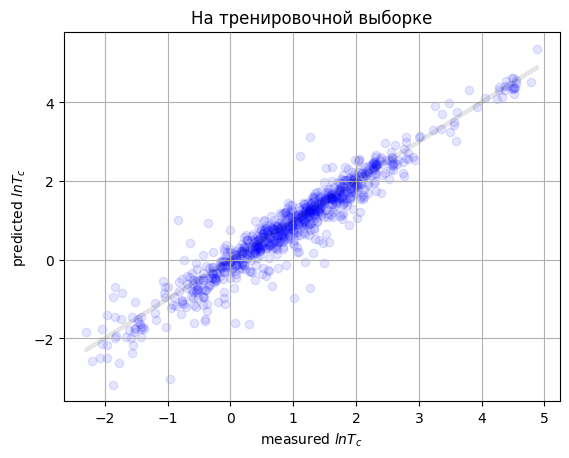

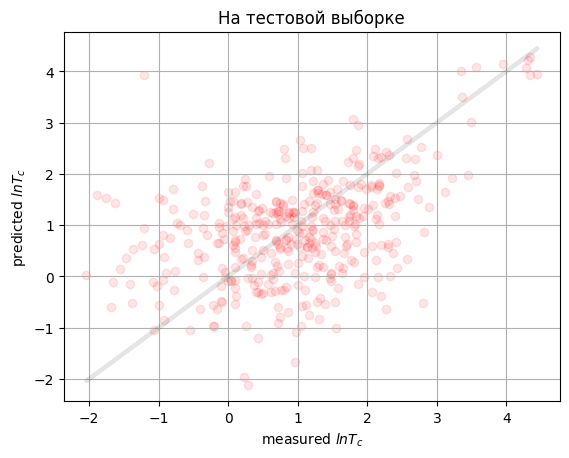

In [43]:
fig, ax = plt.subplots()
ax.grid()


plt.scatter(y_train, predictions_g1, color = 'blue', alpha = 0.1)
plt.plot(y_train, y_train, color = 'black', linewidth = 3, alpha = 0.1)
ax.set_xlabel('measured $ln T_c$')
ax.set_ylabel('predicted $ln T_c$')
plt.title("На тренировочной выборке")
#plt.ylim((0, 4))
plt.show()

plt.grid()
plt.scatter(y_test, predictions_g, color = 'red', alpha = 0.1)
plt.plot(y_test, y_test, color = 'black', linewidth = 3, alpha = 0.1)
plt.xlabel('measured $ln T_c$')
plt.ylabel('predicted $ln T_c$')
plt.title("На тестовой выборке")
#plt.ylim((0, 4))
plt.show()

In [ ]:
X_train, y_train = df2[:1000], targets2[:1000]
X_test, y_test = df2[1000:], targets2[1000:]

param_grid = { 
            "n_estimators"      : [30, 100, 300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
rfr = RandomForestRegressor()
CV_rfr = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 5)
CV_rfr.fit(X_train, y_train)

In [ ]:
CV_rfr.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 300}

In [ ]:
rfr1 = RandomForestRegressor(max_features = 'sqrt', min_samples_split = 4, bootstrap = True, n_estimators = 100)
rfr1.fit(X_train, y_train)
predictions = rfr1.predict(X_test)
predictions1 = rfr1.predict(X_train)

In [ ]:
train_loss = ((predictions1 - y_train) ** 2).sum()
test_loss = ((predictions - y_test) ** 2).sum()
print(train_loss)
print(test_loss)

1545683.924147896
24526.622424673278


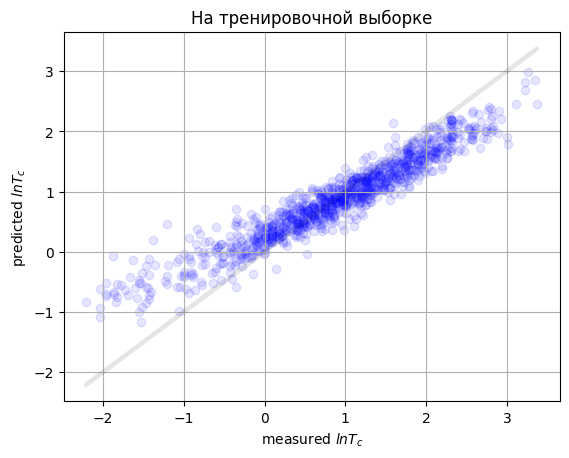

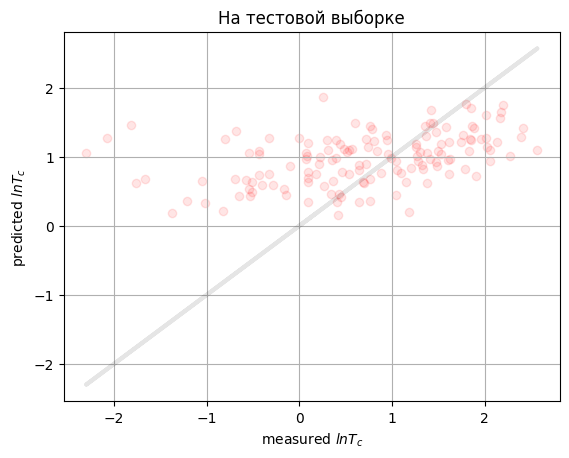

In [ ]:
fig, ax = plt.subplots()
ax.grid()


plt.scatter(y_train, predictions1, color = 'blue', alpha = 0.1)
plt.plot(y_train, y_train, color = 'black', linewidth = 3, alpha = 0.1)
ax.set_xlabel('measured $ln T_c$')
ax.set_ylabel('predicted $ln T_c$')
plt.title("На тренировочной выборке")
#plt.ylim((0, 4))
plt.show()

plt.grid()
plt.scatter(y_test, predictions, color = 'red', alpha = 0.1)
plt.plot(y_test, y_test, color = 'black', linewidth = 3, alpha = 0.1)
plt.xlabel('measured $ln T_c$')
plt.ylabel('predicted $ln T_c$')
plt.title("На тестовой выборке")
#plt.ylim((0, 4))
plt.show()